In [75]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input
from glob import glob
%matplotlib inline

In [76]:
train_path = '/content/drive/MyDrive/Maskdetectiondataset/train'
valid_path = '/content/drive/MyDrive/Maskdetectiondataset/valid'

In [77]:
vgg16 = VGG16(include_top=False,weights = 'imagenet',input_shape=[224,224,3])

In [78]:
for i in vgg16.layers:
  i.trainable = False

In [79]:
vgg16.output

<tf.Tensor 'block5_pool/MaxPool_2:0' shape=(None, 7, 7, 512) dtype=float32>

In [80]:
train_len = glob('/content/drive/MyDrive/Maskdetectiondataset/train/*')
len(train_len)

2

In [81]:
x = Flatten()(vgg16.output)
prediction_vgg16 = Dense(len(train_len),activation='softmax')(x)
model = Model(inputs = vgg16.input,outputs =  prediction_vgg16)


In [82]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [83]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])



In [84]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)



In [85]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)

testing_set = test_datagen.flow_from_directory(valid_path,
                                               target_size = (224,224),
                                               class_mode = 'categorical',
                                               batch_size = 32)

Found 1564 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [86]:
def showimg(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()

  for img,ax in zip(images_arr,axes):
    ax.imshow(img)

  plt.tight_layout()
  plt.show()



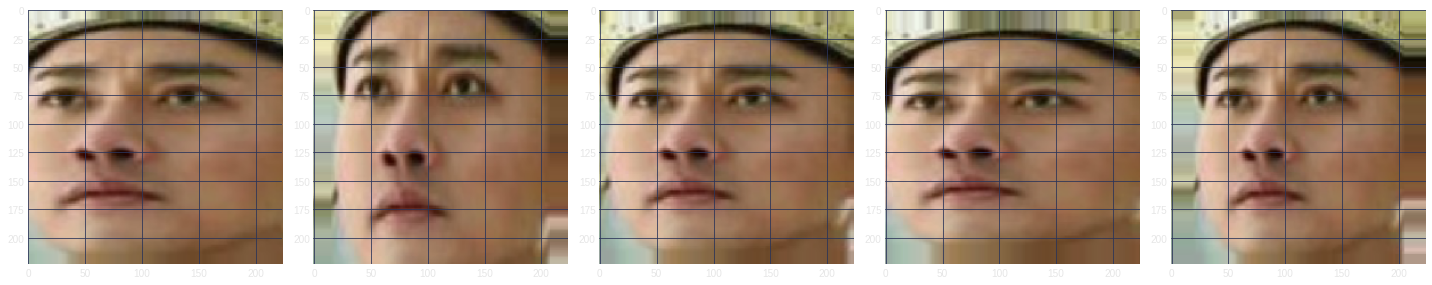

In [87]:
training_image = [training_set[0][0][0] for i in range(5)]
showimg(training_image)

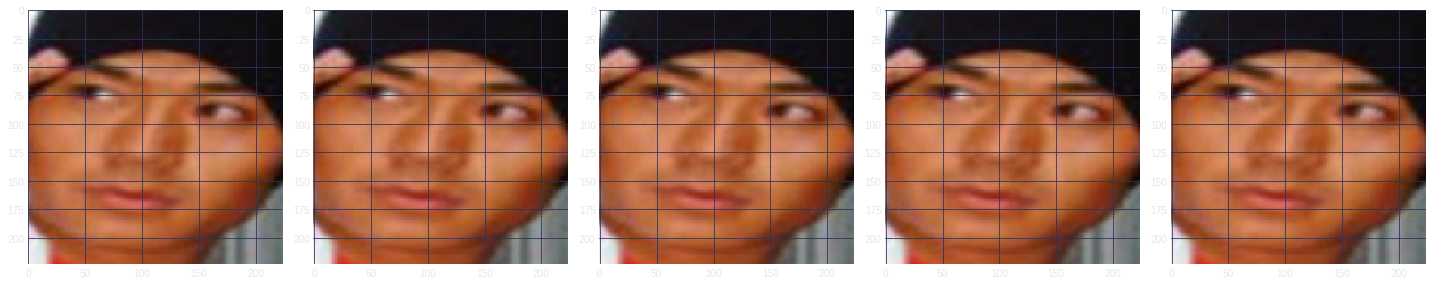

In [88]:
testing_image = [testing_set[0][0][0] for i in range(5)]
showimg(testing_image)

In [ ]:
vgg16_hist = model.fit(training_set,
                       steps_per_epoch = len(training_set),
                       validation_data = testing_set,
                       epochs = 10,
                       validation_steps = len(testing_set))

In [ ]:
! pip install mplcyberpunk

In [91]:
import mplcyberpunk

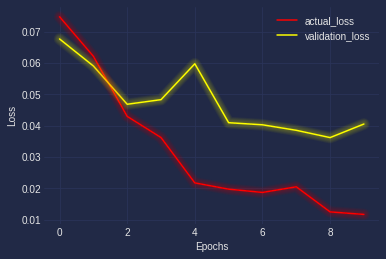

In [92]:
plt.style.use('cyberpunk')
plt.plot(vgg16_hist.history['loss'],label = 'actual_loss',color = 'red')
plt.plot(vgg16_hist.history['val_loss'],label = 'validation_loss',color = 'yellow')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()


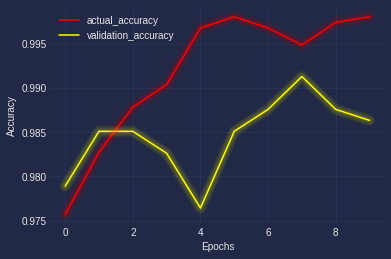

In [93]:
plt.style.use('cyberpunk')
plt.plot(vgg16_hist.history['accuracy'],label = 'actual_accuracy',color = 'red')
plt.plot(vgg16_hist.history['val_accuracy'],label = 'validation_accuracy',color = 'yellow')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()


In [94]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img

In [95]:
list1 = [i for i in glob('/content/drive/MyDrive/Maskdetectiondataset/valid/with_mask/*')]
len(list1)

453

In [ ]:
image_test_mask = [i for i in glob('/content/drive/MyDrive/Maskdetectiondataset/test/with_mask/*')]
image_test_without_mask = [i for i in glob('/content/drive/MyDrive/Maskdetectiondataset/test/without_mask/*')]

image_test_without_mask

In [99]:
os.listdir('/content/drive/MyDrive/Maskdetectiondataset/test/with_mask/')

['152-with-mask.jpg',
 '162-with-mask.jpg',
 '201-with-mask.jpg',
 '1_0_13 copy.jpg',
 '0_0_3-130615133545192.jpg',
 'with_mask641.jpeg',
 '1_0_1 copy 16.jpg',
 '0_0_0 copy 46.jpg',
 'with_mask391.jpg',
 '1_0_52.jpg',
 '0_0_2 copy 16.jpg',
 'with_mask471.jpg',
 'with_mask536.jpg']

**Copying images from to the testing directory using the OS module**

In [100]:
import shutil

In [101]:
def copyimage(image_list,source_path,dest_path):
  for i in range(len(image_list)):
    image = image_list[i]
    to_path = os.path.join(source_path,image)
    dest_path1 = os.path.join(dest_path,image)
    shutil.copy2(to_path,dest_path1)


In [102]:
source_path = '/content/drive/MyDrive/Maskdetectiondataset/test/with_mask/'
dest_path  ='/content/drive/MyDrive/Maskdetectiondataset/test/'
image_list = os.listdir('/content/drive/MyDrive/Maskdetectiondataset/test/with_mask/')
copyimage(image_list,source_path,dest_path)

In [103]:
source_path1 = '/content/drive/MyDrive/Maskdetectiondataset/test/without_mask/'
dest_path2  ='/content/drive/MyDrive/Maskdetectiondataset/test/'
image_list = os.listdir('/content/drive/MyDrive/Maskdetectiondataset/test/without_mask/')
copyimage(image_list,source_path1,dest_path2)

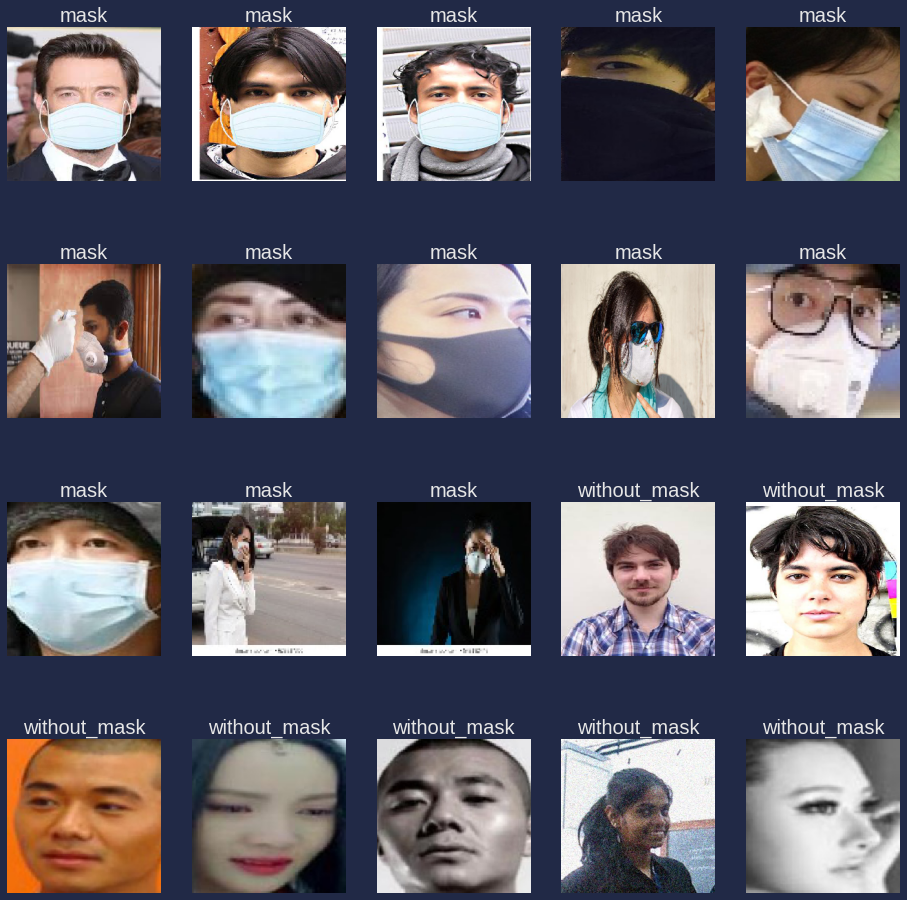

In [120]:
folder_path = '/content/drive/MyDrive/Maskdetectiondataset/test'
image_list = os.listdir(folder_path)
image_list = image_list[:20]
fig = plt.figure(figsize = (16,16))

row = 4
col = 5
j = 0

for i in image_list:
  j+=1
  image1 = load_img(folder_path + '/' + i,target_size=(224,224))
  image_data = image.img_to_array(image1)
  image_data = np.expand_dims(image_data,axis = 0)
  label = model.predict(image_data)

  if label[0][0]==1:
    k = 'mask'
  else:
    k = 'without_mask'

  fig.add_subplot(row,col,j)
  fig.subplots_adjust(hspace  =.5)
  plt.imshow(image1)
  plt.title(k,fontsize = 20)
  plt.axis('off')

plt.show()

# Predictions using  VGG-19 model

In [121]:
vgg_19 = VGG19(include_top = False,weights='imagenet',input_shape=[224,224,3])


80142336/80134624 [==============================] - 3s 0us/step


In [122]:
for i in vgg_19.layers:
  i.trainable = False

  

In [125]:
x = Flatten()(vgg_19.output)

prediction_19 = Dense(len(train_len),activation='softmax')(x)
model_19 = Model(inputs = vgg_19.input,outputs = prediction_19)

In [126]:
model_19.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [127]:
model_19.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

In [128]:
vgg_19_hist = model_19.fit_generator(
    training_set,
    steps_per_epoch = len(training_set),
    validation_data = testing_set,
    epochs = 10,
    validation_steps = len(testing_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
35/49 [====================>.........] - ETA: 7s - loss: 0.6397 - accuracy: 0.7679

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


49/49 [==============================] - 31s 634ms/step - loss: 0.5148 - accuracy: 0.8120 - val_loss: 0.1391 - val_accuracy: 0.9491
Epoch 2/10
49/49 [==============================] - 30s 618ms/step - loss: 0.1139 - accuracy: 0.9559 - val_loss: 0.0891 - val_accuracy: 0.9702
Epoch 3/10
49/49 [==============================] - 30s 622ms/step - loss: 0.0845 - accuracy: 0.9706 - val_loss: 0.1313 - val_accuracy: 0.9491
Epoch 4/10
49/49 [==============================] - 29s 601ms/step - loss: 0.0639 - accuracy: 0.9783 - val_loss: 0.0627 - val_accuracy: 0.9789
Epoch 5/10
49/49 [==============================] - 30s 606ms/step - loss: 0.0464 - accuracy: 0.9872 - val_loss: 0.0619 - val_accuracy: 0.9764
Epoch 6/10
49/49 [==============================] - 30s 604ms/step - loss: 0.0391 - accuracy: 0.9898 - val_loss: 0.0628 - val_accuracy: 0.9777
Epoch 7/10
49/49 [==============================] - 30s 603ms/step - loss: 0.0307 - accuracy: 0.9949 - val_loss: 0.0518 - val_accuracy: 0.9826
Epoch 8/10

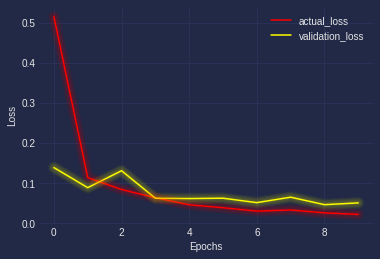

In [130]:
plt.style.use('cyberpunk')
plt.plot(vgg_19_hist.history['loss'],label = 'actual_loss',color = 'red')
plt.plot(vgg_19_hist.history['val_loss'],label = 'validation_loss',color = 'yellow')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()


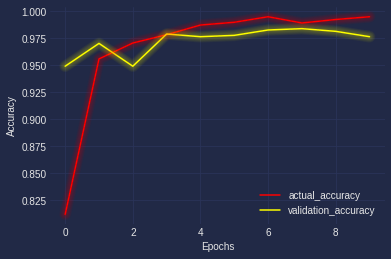

In [131]:
plt.style.use('cyberpunk')
plt.plot(vgg_19_hist.history['accuracy'],label = 'actual_accuracy',color = 'red')
plt.plot(vgg_19_hist.history['val_accuracy'],label = 'validation_accuracy',color = 'yellow')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
mplcyberpunk.make_lines_glow()
plt.show()


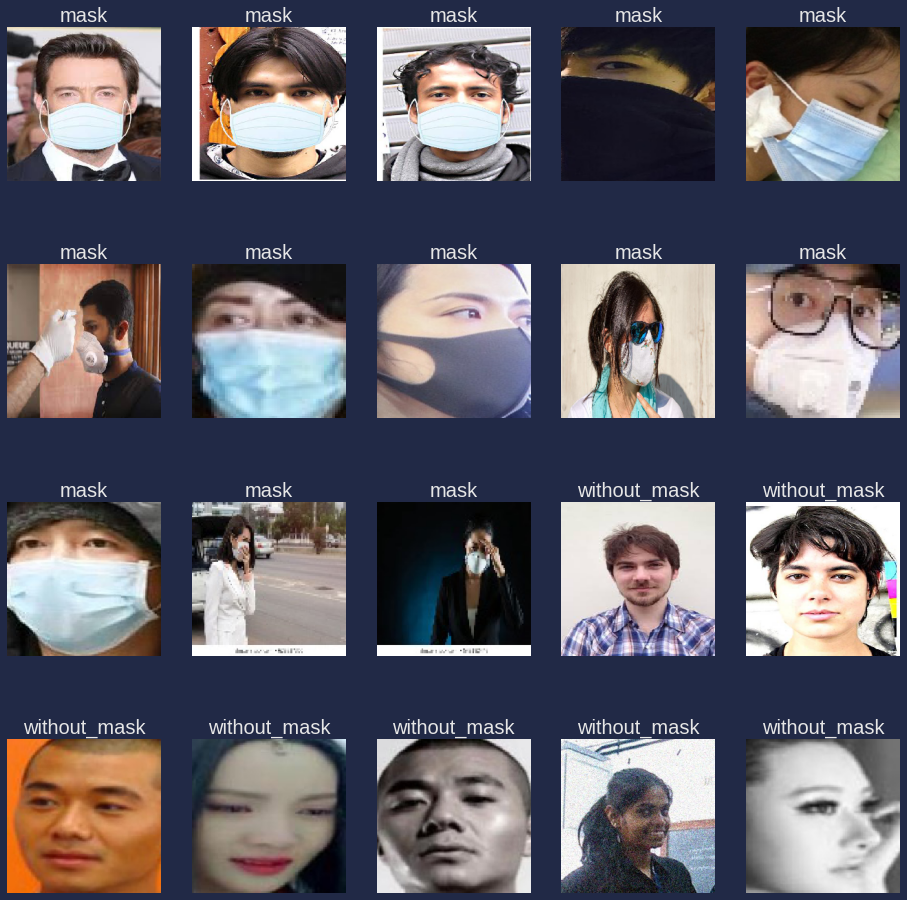

In [132]:
folder_path = '/content/drive/MyDrive/Maskdetectiondataset/test'
image_list = os.listdir(folder_path)
image_list = image_list[:20]
fig = plt.figure(figsize = (16,16))

row = 4
col = 5
j = 0

for i in image_list:
  j+=1
  image1 = load_img(folder_path + '/' + i,target_size=(224,224))
  image_data = image.img_to_array(image1)
  image_data = np.expand_dims(image_data,axis = 0)
  label = model_19.predict(image_data)

  if label[0][0]==1:
    k = 'mask'
  else:
    k = 'without_mask'

  fig.add_subplot(row,col,j)
  fig.subplots_adjust(hspace  =.5)
  plt.imshow(image1)
  plt.title(k,fontsize = 20)
  plt.axis('off')

plt.show()